# Data Cleaning

In [48]:
import pandas as pd

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


### comparing original df with df where target is filled by calculation to see if it is reliable

In [51]:
df_test = df.copy()
df_test["Trip_Price"] = df_test["Trip_Price"].fillna((df_test["Base_Fare"] + (df_test["Per_Km_Rate"]*df_test["Trip_Distance_km"]) + (df_test["Per_Minute_Rate"]*df_test["Trip_Duration_Minutes"])))

df_1 = df[df["Trip_Price"].notna()]
df_2 = df_test[df_test["Trip_Price"].notna()]

df_1["Trip_Price"].mean() - df_2["Trip_Price"].mean()

np.float64(0.07703921304449324)

In [52]:
df_1.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       901 non-null    float64
 1   Time_of_Day            902 non-null    object 
 2   Day_of_Week            905 non-null    object 
 3   Passenger_Count        903 non-null    float64
 4   Traffic_Conditions     901 non-null    object 
 5   Weather                905 non-null    object 
 6   Base_Fare              907 non-null    float64
 7   Per_Km_Rate            907 non-null    float64
 8   Per_Minute_Rate        902 non-null    float64
 9   Trip_Duration_Minutes  905 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------        

#### only 608 rows, trip price is not fully calculated by base fare, distance and duration

In [53]:
testing = df[df["Trip_Price"] == (df["Base_Fare"] + (df["Per_Km_Rate"]*df["Trip_Distance_km"]) + (df["Per_Minute_Rate"]*df["Trip_Duration_Minutes"]))]
testing

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
16,15.91,Morning,Weekday,4.0,Low,Clear,4.42,1.77,0.21,114.93,56.7160
...,...,...,...,...,...,...,...,...,...,...,...
989,41.14,Evening,Weekend,3.0,Medium,Rain,4.14,1.71,0.17,46.78,82.4420
992,14.34,Afternoon,Weekday,1.0,Medium,Clear,3.23,1.01,0.29,45.07,30.7837
994,18.69,Evening,Weekday,3.0,Medium,Clear,4.90,1.79,0.17,79.41,51.8548
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [55]:
df_copy = df.copy()
df_copy["Trip_Price"] = df_copy["Trip_Price"].fillna((df_copy["Base_Fare"] + (df_copy["Per_Km_Rate"]*df_copy["Trip_Distance_km"]) + (df_copy["Per_Minute_Rate"]*df_copy["Trip_Duration_Minutes"])))

# spara alla rader där Trip_Price har ett värde, fortsätt rengöra denna
df_with_price = df_copy[df_copy["Trip_Price"].notna()]

# spara för senare prediction vid user input efter modellen är färdig
df_no_price = df_copy[df_copy["Trip_Price"].isna()]

# tog bort 49 rader
df_with_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       933 non-null    float64
 1   Time_of_Day            933 non-null    object 
 2   Day_of_Week            935 non-null    object 
 3   Passenger_Count        934 non-null    float64
 4   Traffic_Conditions     933 non-null    object 
 5   Weather                935 non-null    object 
 6   Base_Fare              939 non-null    float64
 7   Per_Km_Rate            939 non-null    float64
 8   Per_Minute_Rate        934 non-null    float64
 9   Trip_Duration_Minutes  937 non-null    float64
 10  Trip_Price             983 non-null    float64
dtypes: float64(7), object(4)
memory usage: 92.2+ KB


#### of 983 rows, only 640 matches the condition.    
- not worth trying to fill target values

In [56]:
testing = df_with_price[df_with_price["Trip_Price"] == (df_with_price["Base_Fare"] + (df_with_price["Per_Km_Rate"]*df_with_price["Trip_Distance_km"]) + (df_with_price["Per_Minute_Rate"]*df_with_price["Trip_Duration_Minutes"]))]
testing

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,94.4832
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,42.9425
992,14.34,Afternoon,Weekday,1.0,Medium,Clear,3.23,1.01,0.29,45.07,30.7837
994,18.69,Evening,Weekday,3.0,Medium,Clear,4.90,1.79,0.17,79.41,51.8548
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049


### dividing df into one with values and one with missing values for target column(Trip_Price), for later use with predictions of the missing target data

In [57]:
df_copy = df.copy()

# spara alla rader där Trip_Price har ett värde, fortsätt rengöra denna
df_with_price = df_copy[df_copy["Trip_Price"].notna()]

# spara för senare prediction vid user input efter modellen är färdig
df_no_price = df_copy[df_copy["Trip_Price"].isna()]

# tog bort 49 rader
df_with_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       901 non-null    float64
 1   Time_of_Day            902 non-null    object 
 2   Day_of_Week            905 non-null    object 
 3   Passenger_Count        903 non-null    float64
 4   Traffic_Conditions     901 non-null    object 
 5   Weather                905 non-null    object 
 6   Base_Fare              907 non-null    float64
 7   Per_Km_Rate            907 non-null    float64
 8   Per_Minute_Rate        902 non-null    float64
 9   Trip_Duration_Minutes  905 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


In [58]:
df_no_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 1 to 991
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       49 non-null     float64
 1   Time_of_Day            48 non-null     object 
 2   Day_of_Week            45 non-null     object 
 3   Passenger_Count        47 non-null     float64
 4   Traffic_Conditions     49 non-null     object 
 5   Weather                45 non-null     object 
 6   Base_Fare              43 non-null     float64
 7   Per_Km_Rate            43 non-null     float64
 8   Per_Minute_Rate        48 non-null     float64
 9   Trip_Duration_Minutes  45 non-null     float64
 10  Trip_Price             0 non-null      float64
dtypes: float64(7), object(4)
memory usage: 4.6+ KB


In [59]:
# om alla null kastas, ca 390 rader försvinner
df_no_null = df_with_price.dropna()
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


### filling missing values

In [70]:
# lägger till mean eller median för varje numerisk kolumn beroende på om det finns mycket outliers eller inte
col_funcs = {"Trip_Distance_km": "median", "Passenger_Count": "median", "Base_Fare": "median","Per_Km_Rate": "mean", "Per_Minute_Rate": "median", "Trip_Duration_Minutes": "mean"}
df_clean = df_with_price.copy()
# loopar igenom och ändrar nullvärden till mean eller median
for col, func in col_funcs.items():
    if func == "median":
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    if func == "mean":
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# hämtar ut resterande kolumner som inte är numeriska
object_cols = df_clean.select_dtypes(include=["object"]).columns

# loopar igenom dessa och hämtar ut det mest återkommande värdet för varje kolumn, och fyller i detta värde vid nullvärden
for col in object_cols:
    mode_value = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_value)


# df_clean.head()
(df_clean.describe().T - df_with_price.describe().T)

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,50.0,-0.069453,-0.535349,0.0,0.500,0.000000,-0.850,0.0
Passenger_Count,48.0,-0.024203,-0.023046,0.0,0.000,0.000000,0.000,0.0
Base_Fare,44.0,0.000597,-0.020305,0.0,0.035,0.000000,-0.060,0.0
Per_Km_Rate,44.0,0.000000,-0.010075,0.0,0.020,0.009934,-0.030,0.0
Per_Minute_Rate,49.0,-0.000201,-0.003012,0.0,0.010,0.000000,0.000,0.0
Trip_Duration_Minutes,46.0,0.000000,-0.792232,0.0,1.060,0.474144,-1.335,0.0
Trip_Price,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.000,0.0


### check outliers

<Axes: >

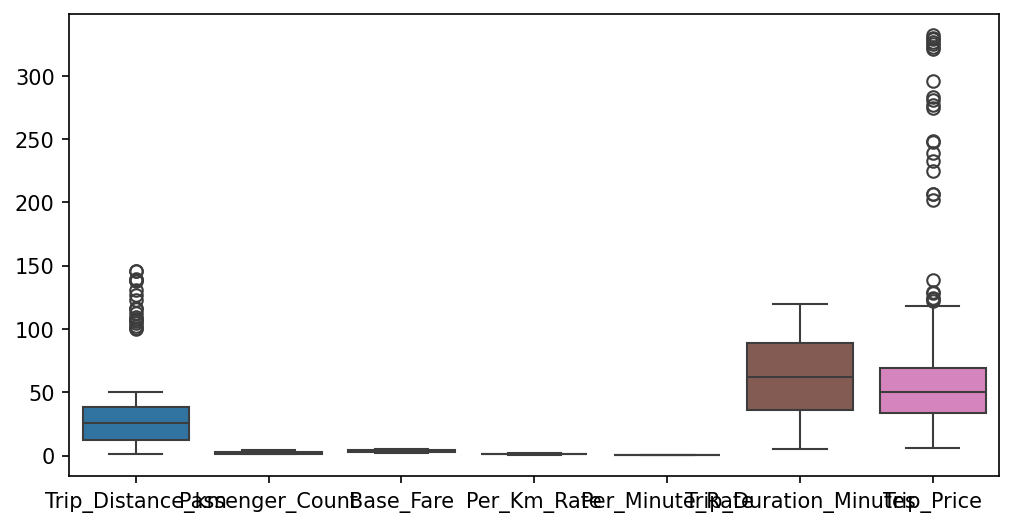

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(8,4), dpi=150)
sns.boxplot(df)

<Axes: >

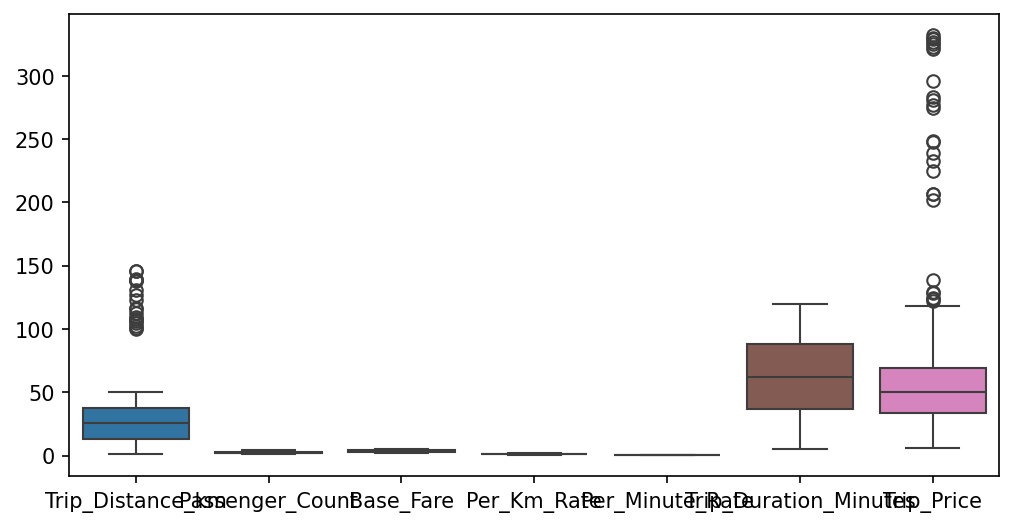

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(8,4), dpi=150)
sns.boxplot(df_clean)

### remove outliers

<Axes: >

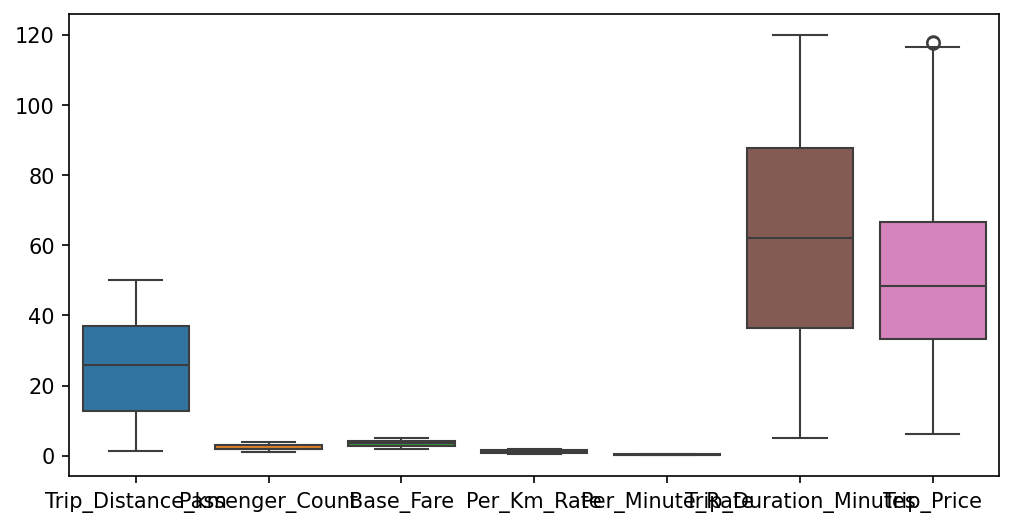

In [63]:
for col in ["Trip_Price", "Trip_Distance_km"]:

    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # Behåll bara värden inom [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    df_clean = df_clean[
        (df_clean[col] >= Q1 - 1.5 * IQR) &
        (df_clean[col] <= Q3 + 1.5 * IQR)
    ]
plt.subplots(1, figsize=(8,4), dpi=150)
sns.boxplot(df_clean)

In [64]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       925 non-null    float64
 1   Time_of_Day            925 non-null    object 
 2   Day_of_Week            925 non-null    object 
 3   Passenger_Count        925 non-null    float64
 4   Traffic_Conditions     925 non-null    object 
 5   Weather                925 non-null    object 
 6   Base_Fare              925 non-null    float64
 7   Per_Km_Rate            925 non-null    float64
 8   Per_Minute_Rate        925 non-null    float64
 9   Trip_Duration_Minutes  925 non-null    float64
 10  Trip_Price             925 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.7+ KB


### Export cleaned data and the data with missing target values for later predictions

In [65]:
df_clean.to_csv("../src/taxipred/data/taxi_trip_pricing_cleaned.csv")
df_no_price.to_csv("../src/taxipred/data/missing_target_data.csv")